<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-103-mna/blob/main/Actividad_2Semana%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 4 - Actividad 2: PCA**
## **Maestría:** Inteligencia Artificial Aplicada
## **Profesor:** Jobish Vallikavungal Devassia
## **Alumnos:** Alejandra Ramírez Romano A01793144
## **Fecha de entrega:** 11 de octubre de 2022

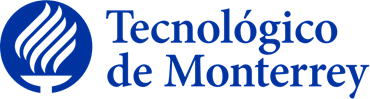


# **1.Limpieza de los Datos en Python**

## 1.1 Importación de los datos

Importamos las librerias ha utilizar.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Configuramos Pandas para que muestre todas las columnas.

In [3]:
pd.set_option("display.max_columns", None)

Creamos una variable que contiene la url donde estan disponibles los datos en formato CSV.

In [4]:
BDCredito = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

Utilizamos Pandas para importar los datos directamente a un DataFrame.
Al darle una URL, Pandas se encarga internamente de la recuperación de los datos.
Le damos el parametro con nombre `index_col = "ID"` para indicar que la columna llamada ID se trata de un índice y no es parte de los datos analizables.
Quitamos el nombre de la columna índice, ya que este no es necesario.


In [5]:
df = pd.read_csv(BDCredito, index_col="ID")
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


## 1.2 Verificación de que no falten datos

Primero averiguamos si existen cualquier cantidad de datos faltantes.

In [6]:
df.isnull().values.any()

True

Ya que sabemos que si hay datos faltantes, usamos este código para averiguar en que columnas.

In [7]:
df.isnull().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Obtenemos el número de datos faltantes por cada columna.

In [8]:
df.isnull().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Generamos una tabla con los estadisticos para saber si la limpieza tendra un impacto significativo en los datos.

In [9]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,29986.000000,29989.000000,29989.000000,2.998700e+04,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,1.150134,73645.219278,71183.385123,6.936086e+04,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3565.000000,2986.000000,2.667500e+03,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67139.000000,64027.000000,6.018200e+04,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## 1.3 Eliminación de datos

Creamos una copia del DataFrame para no manipular los datos originales y poder comparar.

In [10]:
ndf = df.copy()

Eliminación de registros NaN

In [38]:
ndf.dropna(inplace=True)
ndf.shape


(29958, 24)

Volvemos a mostrar la tabla de estadisticas para analizar el efecto en los datos.

In [12]:
ndf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Se comprueba que no hay datos NaN

In [13]:
ndf.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [14]:
ndf.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

##1.4 Clasificación de datos 

Se hace la correcta clasificación del tipo de datos entre variables categóricas y numéricas

In [15]:

ndf['X1'] = ndf['X1'].astype('float64') 
ndf['X2'] = ndf['X2'].astype('category') 
ndf['X3'] = ndf['X3'].astype('category') 
ndf['X4'] = ndf['X4'].astype('category') 
ndf['X6'] = ndf['X6'].astype('category') 
ndf['X7'] = ndf['X7'].astype('category') 
ndf['X8'] = ndf['X8'].astype('category') 
ndf['X9'] = ndf['X9'].astype('category') 
ndf['X10'] = ndf['X10'].astype('category') 
ndf['X11'] = ndf['X11'].astype('category') 
ndf['Y'] = ndf['Y'].astype('category') 
ndf.dtypes


X1      float64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

#2.Modelo PCA

##2.1 Selección de variables para el PCA 

PCA solo acepta variables del tipo numéricas
Se eliminan las columnas categóricas del data frame y re-renombra a X

In [55]:
x = ndf.drop(['X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], axis=1)




##2.2 Normalización de datos

In [43]:
scaled_data = preprocessing.scale(x)
scaled_data

array([[-1.13736269, -1.24628151, -0.64249667, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257,  0.16458968, -0.6472202 , ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196,  0.5987039 , -0.71793741, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232,  1.14134666, -0.04505161, ..., -0.24431534,
        -0.24870184, -0.23726923]])

##2.3 Modelo PCA

In [44]:
pca = PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
pca_data

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00, ...,
        -3.14858410e-03,  8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01, ...,
         1.22574823e-02, -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01, ...,
        -8.04550604e-02, -4.13466939e-02, -5.71189238e-02],
       ...,
       [-1.28525164e+00,  1.46260790e-01,  2.50362188e-01, ...,
         3.47276425e-02,  1.28749411e-02, -1.21264837e-02],
       [ 8.30126576e-01,  2.41954325e+00,  3.63918332e-01, ...,
         1.70414940e-01, -1.39937218e-01, -8.16447343e-03],
       [-5.17390297e-01, -6.00838232e-01, -7.49601106e-01, ...,
        -1.76099500e-02,  1.15296003e-01, -4.70445624e-02]])

Porcentaje de varianza por componente

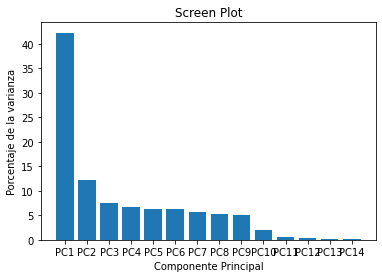

In [45]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+ str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label=labels)
plt.ylabel('Porcentaje de la varianza')
plt.xlabel('Componente Principal')
plt.title('Screen Plot')
plt.show()


Resumen de PCA

In [46]:

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                             'Proportion of variance': pca.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.432921,1.309882,1.022269,0.961876,0.940087,0.934241,0.882984,0.852438,0.841041,0.514249,0.266470,0.202644,0.15918,0.152463
Proportion of variance,0.422779,0.122552,0.074643,0.066084,0.063124,0.062341,0.055688,0.051902,0.050523,0.018889,0.005072,0.002933,0.00181,0.001660
Cumulative proportion,0.422779,0.545331,0.619974,0.686058,0.749182,0.811523,0.867211,0.919113,0.969636,0.988525,0.993597,0.996530,0.99834,1.000000


Los componentes de PC1 a PC8 tienen el 96.9% de varianza acumulada siendo estos los mas representativos

Transponer el data frame para una mejor lectura y para ver como cada varible original (x1-x23) contribuye a los pesos de cada componente (PC1-PC14).

In [47]:
pca_components_df = pd.DataFrame(pca.components_.transpose(),columns = labels,index = x.columns)
pca_components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
X5,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461,-0.078816,0.027368,0.330346,-0.009011,0.000139,-0.001377,0.000132,0.001067
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894


#3.Scatter Plot

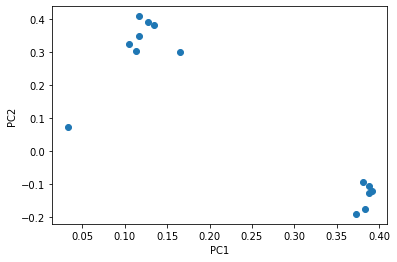

In [54]:


plt.scatter(data=pca_components_df,x="PC1", y="PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Hay 3 clusters de información.

#4.Outliers

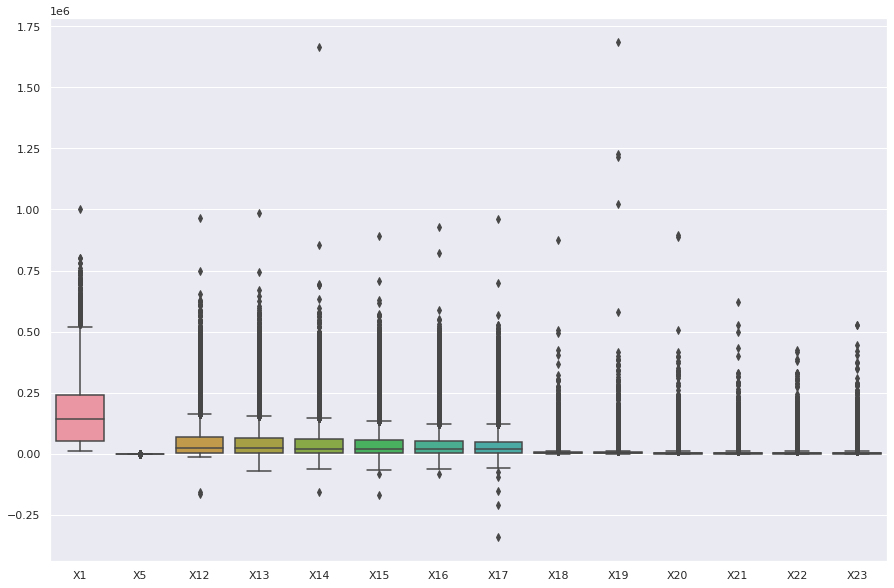

In [85]:
ax = sns.boxplot(data=X)


#5.Preguntas

- 1. ¿Cuál es el número de componentes mínimo y por qué?
- Se generaron 14 componentes, pero se usaron solo 7 porque cubre el 97% de varianza acumulada (PC1-PC8).

- 2. ¿Cuál es la variación de los datos que representan esos componentes?
- PC1: 0.422779; PC2:	0.122552;	PC3:0.074643;	PC4:0.066084;	PC5:0.063124;	PC6:0.062341;	PC7:0.055688	; PC8:0.051902;	PC9:0.050523;	PC10:0.018889;	PC11:0.005072;	PC12:0.002933;	PC13:0.00181;	PC14:0.001660.

- 3. ¿Cuál es la pérdida de información después de realizar PCA?

- Los componentes preservan el 100% de la información solo distribuyen la información de mejor forma, es decir escala la info para que sea comparable en tamaños similares. 

Los componentes de PC1 a PC8 tienen el 96.9% de varianza acumulada, eso quiere decir que por seleccionar eso estariamos perdiendo 3.1% del todo

- 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Tiene mayor importancia las variables que tienen saldos y pagos.
Las de menor importancia son la edad y los saldos totales. 

- 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

- Es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables “menos importantes” manteniendo la parte más importante todas las variables. El beneficio de este algoritmo de aprendizaje no supervisado es la reducción de dimensiones.